In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import spotipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.metrics import pairwise_distances_argmin_min

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Getting the current top songs from Billboard Hot 100

r = requests.get('https://www.billboard.com/charts/hot-100/')
r.status_code

200

In [3]:
html = r.content
soup = BeautifulSoup(html, 'html.parser')

In [4]:
# Creating a data frame with songs and artists from Billboard Hot 100

containers = soup.find_all("div", attrs={"class": "o-chart-results-list-row-container"})

data = []

for container in containers:
    song_name = container.find("h3").get_text(strip=True)
    artist_name = container.find("li", attrs={"class": "lrv-u-width-100p"}).find("span").get_text(strip=True)
    data.append((song_name, artist_name))
    
billboard_chart = pd.DataFrame(data, columns=['Song' , 'Artist'])
billboard_chart

,Song,Artist
0,Last Night,Morgan Wallen
1,Flowers,Miley Cyrus
2,Kill Bill,SZA
3,Die For You,The Weeknd & Ariana Grande
4,"Boy's A Liar, Pt. 2",PinkPantheress & Ice Spice
...,...,...
95,Nonsense,Sabrina Carpenter
96,AMG,"Gabito Ballesteros, Peso Pluma & Natanael Cano"
97,Lift Me Up,Rihanna
98,You Didn't,Brett Young


In [5]:
# Tranforming the artists from Billboard chart into a list

billboard_artists = list(billboard_chart['Artist'])
billboard_artists

['Morgan Wallen',
 'Miley Cyrus',
 'SZA',
 'The Weeknd & Ariana Grande',
 'PinkPantheress & Ice Spice',
 'Metro Boomin, The Weeknd & 21 Savage',
 'Morgan Wallen',
 'Morgan Wallen',
 'Morgan Wallen',
 'Morgan Wallen',
 'Morgan Wallen',
 'Taylor Swift',
 'Nicki Minaj',
 'Morgan Wallen',
 'Morgan Wallen Featuring Eric Church',
 'Sam Smith & Kim Petras',
 'Karol G x Shakira',
 'Morgan Wallen',
 'Rema & Selena Gomez',
 'Bailey Zimmerman',
 'David Guetta & Bebe Rexha',
 'Lil Uzi Vert',
 'Harry Styles',
 'Coi Leray',
 'Beyonce',
 'Chris Brown',
 'Morgan Wallen',
 'Kane Brown With Katelyn Brown',
 'Morgan Wallen',
 'Morgan Wallen',
 'Taylor Swift',
 'Morgan Wallen',
 'RAYE Featuring 070 Shake',
 'Drake & 21 Savage',
 'Morgan Wallen',
 'Luke Combs',
 'Miguel',
 'Morgan Wallen',
 'Stephen Sanchez',
 'Morgan Wallen Featuring ERNEST',
 'Morgan Wallen',
 'Zach Bryan',
 'Morgan Wallen',
 'Morgan Wallen',
 'Metro Boomin, Future & Chris Brown',
 'SZA',
 'Morgan Wallen Featuring HARDY',
 'Morgan Wallen

In [6]:
# Getting the top songs of 2022 from NPR 

r = requests.get('https://www.npr.org/2022/12/15/1135802083/100-best-songs-2022-page-1')
r.status_code

200

In [7]:
soup = BeautifulSoup(r.content, 'html.parser')

In [8]:
pages = [i.get('href') for i in soup.find('font', attrs={'style': "font-family:Gotham SSm,Helvetica,Arial,sans-serif;font-size:16px"}).find_all('a')] 
page_1 = ['/2022/12/15/1135802083/100-best-songs-2022-page-1']

In [9]:
starts = page_1 + pages
rev_starts = starts[::-1]
rev_starts

['/2022/12/15/1135804266/100-best-songs-2022-page-5',
 '/2022/12/15/1135803900/100-best-songs-2022-page-4',
 '/2022/12/15/1135803422/100-best-songs-2022-page-3',
 '/2022/12/15/1135802978/100-best-songs-2022-page-2',
 '/2022/12/15/1135802083/100-best-songs-2022-page-1']

In [10]:
# Creating a data frame with songs and artists from NPR Best Songs fo 2022

data = []
artist_name = []
song_name = []

for start in rev_starts:
    r = requests.get(f'https://www.npr.org{start}')
    soup = BeautifulSoup(r.content, 'html.parser')
    songs = [i.get_text(strip=True) for i in soup.find_all('h3', attrs={'class': "edTag"})]
    artist_name.extend(songs[:-1:2][::-1]) 
    song_name.extend(songs[1::2][::-1])
    
data = zip(song_name, artist_name)

npr_chart = pd.DataFrame(data, columns=['Song' , 'Artist'])
npr_chart

,Song,Artist
0,"""F.N.F. (Let's Go)""",Hitkidd & GloRilla
1,"""ALIEN SUPERSTAR""",Beyoncé
2,"""El Apagón""",Bad Bunny
3,"""Runner""",Alex G
4,"""SAOKO""",ROSALÍA
...,...,...
95,"""Shakedhat""","Zahsosaa, D STURDY & DJ Crazy"
96,"""Middle of a Heart""",Adeem the Artist
97,"""Leave It Alone (Remix)""",Viking Ding Dong x Ravi B
98,"""Attention For It Radiates""",Ian William Craig


In [11]:
# Tranforming the artists from NPR chart into a list

npr_artists = list(npr_chart['Artist'])
npr_artists

['Hitkidd & GloRilla',
 'Beyoncé',
 'Bad Bunny',
 'Alex G',
 'ROSALÍA',
 'Gunna & Future feat. Young Thug',
 'Paramore',
 'MUNA',
 'Joyce Wrice x KAYTRANADA',
 'Steve Lacy',
 'Stromae',
 'Harry Styles',
 'Fontaines D.C.',
 'Zach Bryan',
 'SZA',
 'Lizzo',
 'Fireboy DML & Asake',
 'Plains',
 'Third Coast Percussion',
 'Molly Nilsson',
 'Omar Apollo',
 "Let's Eat Grandma",
 'The Beths',
 'Megan Thee Stallion',
 'Ethel Cain',
 'Makaya McCraven',
 'Kevin Morby',
 'Porridge Radio',
 'Hermanos Gutiérrez',
 'SiR feat. Scribz Riley',
 'Koffee',
 'Hikaru Utada',
 'Taylor Swift',
 'Julia Bullock',
 'Doechii',
 'Joan Shelley feat. Bill Callahan',
 'NxWorries feat. H.E.R.',
 'Joy Orbison x Overmono feat. ABRA',
 'Ice Spice',
 'Syd feat. Lucky Daye',
 'Sean Shibe',
 'Anna Butterss',
 'Rico Nasty',
 'Maggie Rogers',
 'Julius Rodriguez',
 'Fly Anakin',
 'Sudan Archives',
 'Kendrick Lamar',
 'Flo Milli',
 'LE SSERAFIM',
 'Soccer Mommy',
 'LF System',
 'Lil Yachty',
 'Víkingur Ólafsson',
 'Yahritza y Su

In [42]:
# Accessing Spotify API

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="39cf95fbc68a4b88b5d12c27fddd262a",
                                                           client_secret="845e5a64cd79477d8ca382e374486a1b"))

In [13]:
# Getting track ids, song names and audio features from artists

def get_audio_features(artist):
    results = sp.search(q=f'artist:{artist}', limit=50)
    track_ids = [track['id'] for track in results['tracks']['items']]
    song_names = [track['name'] for track in results['tracks']['items']]
    
    if song_names:
        audio_features = sp.audio_features(track_ids)
        if audio_features:
            try:
                df = pd.DataFrame(audio_features)
                df['artist'] = artist
                df['song name'] = song_names
                return df
            except Exception as e:
                print(e)
    

In [14]:
# Using artists from Billboard Hot 100 to create a data frame with their songs' audio features

artists = billboard_artists

df = pd.DataFrame()

for artist in artists:
    df_artist = get_audio_features(artist)
    if df_artist is not None:
        df = pd.concat([df, df_artist])
    
df_billboard_artists = df.reset_index(drop=True)
df_billboard_artists

'NoneType' object has no attribute 'keys'
'NoneType' object has no attribute 'keys'


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song name
0,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,0.1510,0.518,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,Morgan Wallen,Last Night
1,0.492,0.675,6,-5.456,1,0.0389,0.46700,0.000000,0.1420,0.478,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4,Morgan Wallen,Last Night
2,0.641,0.803,6,-5.781,0,0.0286,0.00232,0.000004,0.3610,0.671,121.086,audio_features,2YVlDlk2zRceefo6XlC6DX,spotify:track:2YVlDlk2zRceefo6XlC6DX,https://api.spotify.com/v1/tracks/2YVlDlk2zRce...,https://api.spotify.com/v1/audio-analysis/2YVl...,158004,4,Morgan Wallen,Ain’t That Some
3,0.656,0.757,3,-5.775,0,0.0308,0.49200,0.000000,0.1170,0.429,139.971,audio_features,0PAcdVzhPO4gq1Iym9ESnK,spotify:track:0PAcdVzhPO4gq1Iym9ESnK,https://api.spotify.com/v1/tracks/0PAcdVzhPO4g...,https://api.spotify.com/v1/audio-analysis/0PAc...,177388,4,Morgan Wallen,Thinkin’ Bout Me
4,0.498,0.764,4,-5.006,1,0.0309,0.12300,0.000031,0.1190,0.489,147.984,audio_features,73zawW1ttszLRgT9By826D,spotify:track:73zawW1ttszLRgT9By826D,https://api.spotify.com/v1/tracks/73zawW1ttszL...,https://api.spotify.com/v1/audio-analysis/73za...,191231,4,Morgan Wallen,Man Made A Bar (feat. Eric Church)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3504,0.505,0.722,8,-5.148,1,0.0326,0.02800,0.000000,0.1050,0.723,160.041,audio_features,3S1ml6NqVkVBjYNB8QgXE7,spotify:track:3S1ml6NqVkVBjYNB8QgXE7,https://api.spotify.com/v1/tracks/3S1ml6NqVkVB...,https://api.spotify.com/v1/audio-analysis/3S1m...,188280,4,Brett Young,Runnin’ Away From Home
3505,0.621,0.613,3,-8.778,1,0.0265,0.03650,0.010400,0.1230,0.339,110.002,audio_features,11hil3T4O8IqmSUQ4HoOpY,spotify:track:11hil3T4O8IqmSUQ4HoOpY,https://api.spotify.com/v1/tracks/11hil3T4O8Iq...,https://api.spotify.com/v1/audio-analysis/11hi...,269293,4,Brett Young,The Ship And The Bottle
3506,0.429,0.458,2,-6.163,1,0.0346,0.73200,0.000000,0.1080,0.506,148.337,audio_features,15rzB9pYy9vOrbI8Lo0iXG,spotify:track:15rzB9pYy9vOrbI8Lo0iXG,https://api.spotify.com/v1/tracks/15rzB9pYy9vO...,https://api.spotify.com/v1/audio-analysis/15rz...,245947,4,Brett Young,Don’t Wanna Write This Song - The Acoustic Ses...
3507,0.308,0.739,7,-5.481,1,0.0404,0.03890,0.000017,0.2400,0.572,69.938,audio_features,6RbVP4qyOctqbg10v3WEJh,spotify:track:6RbVP4qyOctqbg10v3WEJh,https://api.spotify.com/v1/tracks/6RbVP4qyOctq...,https://api.spotify.com/v1/audio-analysis/6RbV...,206400,4,Brett Young,Long Way Home - From The Motion Picture “Fathe...


In [17]:
# Using artists from NPR to create a data frame with their songs' audio features

artists = npr_artists

df = pd.DataFrame()

for artist in artists:
    df_artist = get_audio_features(artist)
    if df_artist is not None:
        df = pd.concat([df, df_artist])
    
df_npr_artists = df.reset_index(drop=True)
df_npr_artists

'NoneType' object has no attribute 'keys'


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song name
0,0.864,0.476,1,-10.068,1,0.4360,0.03740,0.000000,0.3740,0.647,157.144,audio_features,1b0fbclKNyeIDRSJ6zEbe6,spotify:track:1b0fbclKNyeIDRSJ6zEbe6,https://api.spotify.com/v1/tracks/1b0fbclKNyeI...,https://api.spotify.com/v1/audio-analysis/1b0f...,137580,4,Hitkidd & GloRilla,F.N.F. (Let's Go)
1,0.780,0.689,7,-5.668,1,0.1410,0.03680,0.000010,0.0698,0.642,115.042,audio_features,1xzi1Jcr7mEi9K2RfzLOqS,spotify:track:1xzi1Jcr7mEi9K2RfzLOqS,https://api.spotify.com/v1/tracks/1xzi1Jcr7mEi...,https://api.spotify.com/v1/audio-analysis/1xzi...,225389,4,Beyoncé,CUFF IT
2,0.789,0.614,1,-6.491,1,0.0579,0.00348,0.001520,0.2830,0.108,126.035,audio_features,2XMAWynSTIst5KmLSv0Npf,spotify:track:2XMAWynSTIst5KmLSv0Npf,https://api.spotify.com/v1/tracks/2XMAWynSTIst...,https://api.spotify.com/v1/audio-analysis/2XMA...,198898,4,Beyoncé,AMERICA HAS A PROBLEM
3,0.646,0.770,2,-6.596,0,0.2260,0.00249,0.000000,0.0715,0.681,99.165,audio_features,5IVuqXILoxVWvWEPm82Jxr,spotify:track:5IVuqXILoxVWvWEPm82Jxr,https://api.spotify.com/v1/tracks/5IVuqXILoxVW...,https://api.spotify.com/v1/audio-analysis/5IVu...,236133,4,Beyoncé,Crazy In Love (feat. Jay-Z)
4,0.660,0.688,7,-6.340,1,0.0564,0.43400,0.000000,0.4890,0.650,118.050,audio_features,7eQpbVg3tjHmtdOlAHxaTr,spotify:track:7eQpbVg3tjHmtdOlAHxaTr,https://api.spotify.com/v1/tracks/7eQpbVg3tjHm...,https://api.spotify.com/v1/audio-analysis/7eQp...,249407,4,Beyoncé,CUFF IT - WETTER REMIX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3838,0.383,0.536,0,-8.432,0,0.2230,0.26600,0.000578,0.0624,0.369,88.074,audio_features,5MfpWWRY5ZzgZExDdCILw5,spotify:track:5MfpWWRY5ZzgZExDdCILw5,https://api.spotify.com/v1/tracks/5MfpWWRY5Zzg...,https://api.spotify.com/v1/audio-analysis/5Mfp...,235248,4,Little Simz,One In Rotation + Wide Awake
3839,0.541,0.706,4,-6.227,0,0.2170,0.00252,0.000113,0.1190,0.536,180.781,audio_features,6Zz6sCwWGbadWXFxSFRpVe,spotify:track:6Zz6sCwWGbadWXFxSFRpVe,https://api.spotify.com/v1/tracks/6Zz6sCwWGbad...,https://api.spotify.com/v1/audio-analysis/6Zz6...,195509,4,Little Simz,Therapy
3840,0.374,0.771,1,-6.705,1,0.2120,0.33300,0.004350,0.1300,0.336,79.563,audio_features,5LJeOvPt1DHfxllkiWZ6wm,spotify:track:5LJeOvPt1DHfxllkiWZ6wm,https://api.spotify.com/v1/tracks/5LJeOvPt1DHf...,https://api.spotify.com/v1/audio-analysis/5LJe...,363483,4,Little Simz,Our Conversations w/ Badbadnotgood
3841,0.750,0.492,5,-5.928,0,0.1790,0.13700,0.000274,0.3540,0.389,162.033,audio_features,3Q1HNg15qwjOlDy5ia1NJc,spotify:track:3Q1HNg15qwjOlDy5ia1NJc,https://api.spotify.com/v1/tracks/3Q1HNg15qwjO...,https://api.spotify.com/v1/audio-analysis/3Q1H...,120397,4,Little Simz,damn right


In [18]:
# Getting tracks from a playlist

def get_playlist_tracks(username, playlist_id):
    
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results['items']

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    
    return tracks

In [19]:
# Getting artists from a playlist so I can later get those artists' top songs info

def get_artists_from_playlist(playlist_id):
    
    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
    
    artists = []
    
    for track in tracks_from_playlist:
        artists_info = track['track']['artists']
        
        for artist_info in artists_info:
            artists.append(artist_info['name'])
    
    return list(set(artists))

In [20]:
# Getting the artists from Spotify Top 50 chart playlist

artists_sp_top50 = get_artists_from_playlist("37i9dQZEVXbNG2KDcFcKOF")
artists_sp_top50

['Arctic Monkeys',
 'Lizzy McAlpine',
 'Miguel',
 'Rema',
 '21 Savage',
 'Fuerza Regida',
 'Natanael Cano',
 'Nico Valdi',
 'Ozuna',
 'RAYE',
 'Chris Brown',
 '070 Shake',
 'Peso Pluma',
 'Grupo Frontera',
 'Quevedo',
 'The Weeknd',
 'Ice Spice',
 'Migrantes',
 'Ana Castela',
 'Selena Gomez',
 'Shakira',
 'David Guetta',
 'Daft Punk',
 'JVKE',
 'LiL CaKe',
 'j-hope',
 'Yandel',
 'Ariana Grande',
 'Em Beihold',
 'Gorillaz',
 'Romeo Santos',
 'J. Cole',
 'Imagine Dragons',
 'd4vd',
 'Manuel Turizo',
 'Stephen Sanchez',
 'Kim Petras',
 'Drake',
 'Morgan Wallen',
 'Bizarrap',
 'Tom Odell',
 'Harry Styles',
 'Arcángel',
 'Gabito Ballesteros',
 'Coi Leray',
 'Eminem',
 'Lil Uzi Vert',
 'Chencho Corleone',
 'KAROL G',
 'Bebe Rexha',
 'Miley Cyrus',
 'Metro Boomin',
 'NewJeans',
 'OneRepublic',
 'Taylor Swift',
 'Sam Smith',
 'Feid',
 'Bad Bunny',
 'AgroPlay',
 'SZA',
 'PinkPantheress']

In [21]:
# Getting audio features from songs of Spotify Top 50 playlist's artists

artists = artists_sp_top50

df = pd.DataFrame()

for artist in artists:
    df_artist = get_audio_features(artist)
    if df_artist is not None:
        df = pd.concat([df, df_artist])
    
df_artists_sp_top50 = df.reset_index(drop=True)
df_artists_sp_top50

'NoneType' object has no attribute 'keys'


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song name
0,0.520,0.852,0,-5.866,1,0.0543,0.00237,0.000058,0.0733,0.234,140.267,audio_features,58ge6dfP91o9oXMzq3XkIS,spotify:track:58ge6dfP91o9oXMzq3XkIS,https://api.spotify.com/v1/tracks/58ge6dfP91o9...,https://api.spotify.com/v1/audio-analysis/58ge...,253587,4,Arctic Monkeys,505
1,0.464,0.417,0,-9.345,0,0.0256,0.13600,0.022000,0.0974,0.479,67.528,audio_features,5XeFesFbtLpXzIVDNQP22n,spotify:track:5XeFesFbtLpXzIVDNQP22n,https://api.spotify.com/v1/tracks/5XeFesFbtLpX...,https://api.spotify.com/v1/audio-analysis/5XeF...,183956,4,Arctic Monkeys,I Wanna Be Yours
2,0.691,0.631,2,-6.478,1,0.0368,0.04830,0.000011,0.1040,0.800,92.004,audio_features,086myS9r57YsLbJpU0TgK9,spotify:track:086myS9r57YsLbJpU0TgK9,https://api.spotify.com/v1/tracks/086myS9r57Ys...,https://api.spotify.com/v1/audio-analysis/086m...,161124,4,Arctic Monkeys,Why'd You Only Call Me When You're High?
3,0.548,0.532,5,-7.596,1,0.0323,0.18600,0.000263,0.2170,0.405,85.030,audio_features,5FVd6KXrgO9B3JPmC8OPst,spotify:track:5FVd6KXrgO9B3JPmC8OPst,https://api.spotify.com/v1/tracks/5FVd6KXrgO9B...,https://api.spotify.com/v1/audio-analysis/5FVd...,272394,4,Arctic Monkeys,Do I Wanna Know?
4,0.288,0.758,6,-5.692,0,0.0371,0.00616,0.000000,0.3030,0.619,97.094,audio_features,2AT8iROs4FQueDv2c8q2KE,spotify:track:2AT8iROs4FQueDv2c8q2KE,https://api.spotify.com/v1/tracks/2AT8iROs4FQu...,https://api.spotify.com/v1/audio-analysis/2AT8...,201726,4,Arctic Monkeys,R U Mine?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,0.699,0.628,0,-5.163,0,0.0369,0.49000,0.782000,0.1010,0.607,79.968,audio_features,7e6S4ISzGm5xFjqsxFdeFs,spotify:track:7e6S4ISzGm5xFjqsxFdeFs,https://api.spotify.com/v1/tracks/7e6S4ISzGm5x...,https://api.spotify.com/v1/audio-analysis/7e6S...,138268,4,PinkPantheress,Passion
2790,0.804,0.609,0,-7.848,1,0.0633,0.68000,0.002530,0.2610,0.713,133.043,audio_features,2g2iYtf7urmidG7t47N9wY,spotify:track:2g2iYtf7urmidG7t47N9wY,https://api.spotify.com/v1/tracks/2g2iYtf7urmi...,https://api.spotify.com/v1/audio-analysis/2g2i...,116213,4,PinkPantheress,Just for me
2791,0.499,0.856,11,-5.705,1,0.0610,0.05440,0.131000,0.0734,0.394,163.956,audio_features,1pPCTR0OJkvjWI3Sy7HBcN,spotify:track:1pPCTR0OJkvjWI3Sy7HBcN,https://api.spotify.com/v1/tracks/1pPCTR0OJkvj...,https://api.spotify.com/v1/audio-analysis/1pPC...,82227,4,PinkPantheress,Noticed I cried
2792,0.719,0.549,10,-8.297,1,0.1470,0.32700,0.148000,0.1170,0.192,102.092,audio_features,5ykQfebwM1aWxBhNrz3kM6,spotify:track:5ykQfebwM1aWxBhNrz3kM6,https://api.spotify.com/v1/tracks/5ykQfebwM1aW...,https://api.spotify.com/v1/audio-analysis/5ykQ...,118813,4,PinkPantheress,All my friends know


In [22]:
# Getting the artists from Spotify Viral 50 chart playlist

artists_sp_viral50 = get_artists_from_playlist("37i9dQZEVXbLiRSasKsNU9")
artists_sp_viral50

['Mohit Lalwani',
 'Jann',
 'Zach Templar',
 'Ice Spice',
 'Jimin',
 'Clara La San',
 'Tommy Boysen',
 'Kenia OS',
 'Jeff Grecia',
 'sped up nightcore',
 'Yuri Redicopa',
 'Sharn',
 'Daisy Jones & The Six',
 'Tangerine Kitty',
 'Hozwal',
 'PinkPantheress',
 '40k',
 'Superstar Pride',
 'Lizzy McAlpine',
 'El Rey',
 'Balbi El Chamako',
 'Raim Laode',
 'Ronghao Li',
 'Qimp',
 'Gabriela Rocha',
 'keshi',
 'Shiloh Dynasty',
 'Taiu',
 'CORBAL',
 'Gino Mella',
 'TINI',
 'The Paul',
 'Bayriton',
 'Semicenk',
 'Gringuitos Records',
 'Niall Horan',
 'AgroPlay',
 'Treyce',
 'Jogja Hip Hop Foundation',
 'Ana Castela',
 'GenriX',
 'Lil Geniuz',
 'Dilaw',
 'Reynmen',
 'Milo j',
 'Heyek Crew',
 'Nickoog Clk',
 'Toosii',
 'Big One',
 'SWIRF',
 'TV Girl',
 'Bayron Fire',
 'XG',
 'Lumi Athena',
 'Chino Pacas',
 'Emilia',
 'Kaifi Khalil',
 'NF',
 'Jairo Vera',
 'B4TU INC.',
 'Callejero Fino',
 'Morgan Wallen',
 'Young Miko',
 'Dj Bnão',
 'Augusto e Rafael',
 'Lil Uzi Vert',
 'Mae Stephens',
 'Soap&Skin',

In [23]:
# Getting audio features from songs of Spotify Viral 50 playlist's artists

artists = artists_sp_viral50

df = pd.DataFrame()

for artist in artists:
    df_artist = get_audio_features(artist)
    if df_artist is not None:
        df = pd.concat([df, df_artist])
    
df_artists_sp_viral50 = df.reset_index(drop=True)
df_artists_sp_viral50

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song name
0,0.698,0.446,4,-11.845,1,0.0280,0.872000,0.000030,0.0736,0.2970,109.969,audio_features,2Aoa19SSrNJsvbJtFdoou6,spotify:track:2Aoa19SSrNJsvbJtFdoou6,https://api.spotify.com/v1/tracks/2Aoa19SSrNJs...,https://api.spotify.com/v1/audio-analysis/2Aoa...,288545,1,Mohit Lalwani,Tum Prem Ho Reprise
1,0.237,0.133,2,-20.336,1,0.0348,0.842000,0.000033,0.3890,0.0970,171.490,audio_features,1PSFtCx1i5J6b7mSxhTXIz,spotify:track:1PSFtCx1i5J6b7mSxhTXIz,https://api.spotify.com/v1/tracks/1PSFtCx1i5J6...,https://api.spotify.com/v1/audio-analysis/1PSF...,102907,4,Mohit Lalwani,Samay Samjhayega (Lofi)
2,0.694,0.524,4,-11.490,1,0.0312,0.751000,0.000000,0.0854,0.3470,110.013,audio_features,3Pmlx2PFC59iJQeIHY8ZnL,spotify:track:3Pmlx2PFC59iJQeIHY8ZnL,https://api.spotify.com/v1/tracks/3Pmlx2PFC59i...,https://api.spotify.com/v1/audio-analysis/3Pml...,502636,1,Mohit Lalwani,Radha Krishna Naamawali Chant
3,0.530,0.325,6,-10.305,0,0.0288,0.896000,0.000009,0.0947,0.3380,131.816,audio_features,0XLWLvnDipMUfBggiT9RbG,spotify:track:0XLWLvnDipMUfBggiT9RbG,https://api.spotify.com/v1/tracks/0XLWLvnDipMU...,https://api.spotify.com/v1/audio-analysis/0XLW...,283636,4,Mohit Lalwani,Mere Shyam
4,0.608,0.389,4,-6.728,1,0.0253,0.775000,0.000000,0.2060,0.3960,108.002,audio_features,2BnfrAGeO1m2klPM5YUZCW,spotify:track:2BnfrAGeO1m2klPM5YUZCW,https://api.spotify.com/v1/tracks/2BnfrAGeO1m2...,https://api.spotify.com/v1/audio-analysis/2Bnf...,411500,1,Mohit Lalwani,Tum Hi Tum (Radha Krishna) - Reprise Version
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,0.247,0.869,6,-4.781,0,0.0958,0.000184,0.000001,0.4040,0.2500,202.792,audio_features,1JjiTsqfpfMoukoIW9cM5O,spotify:track:1JjiTsqfpfMoukoIW9cM5O,https://api.spotify.com/v1/tracks/1JjiTsqfpfMo...,https://api.spotify.com/v1/audio-analysis/1Jji...,126897,5,jnhygs,XTAYALIVE
2477,0.547,0.863,8,-4.715,0,0.0841,0.000016,0.000186,0.3540,0.5020,118.719,audio_features,3kT9d883WaRCyzvDyRTagb,spotify:track:3kT9d883WaRCyzvDyRTagb,https://api.spotify.com/v1/tracks/3kT9d883WaRC...,https://api.spotify.com/v1/audio-analysis/3kT9...,109394,3,jnhygs,XTAYALIVE (Sped Up)
2478,0.366,0.857,10,-7.160,0,0.0426,0.000771,0.000066,0.4050,0.4690,77.229,audio_features,0iYhjUEvAu5RYegxvEM2zj,spotify:track:0iYhjUEvAu5RYegxvEM2zj,https://api.spotify.com/v1/tracks/0iYhjUEvAu5R...,https://api.spotify.com/v1/audio-analysis/0iYh...,149291,5,jnhygs,XTAYALIVE (Slowed + Reverb)
2479,0.247,0.869,6,-4.781,0,0.0958,0.000184,0.000001,0.4040,0.2500,202.792,audio_features,6GW4ryGL9k8HUjBB8F7AAN,spotify:track:6GW4ryGL9k8HUjBB8F7AAN,https://api.spotify.com/v1/tracks/6GW4ryGL9k8H...,https://api.spotify.com/v1/audio-analysis/6GW4...,126897,5,jnhygs,XTAYALIVE


In [24]:
# Concatenating all databases into one

df_all_songs = pd.concat([df_billboard_artists, df_npr_artists, df_artists_sp_top50, df_artists_sp_viral50])

In [25]:
df_all_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song name
0,0.517,0.675,6,-5.382,1,0.0357,0.459000,0.000000,0.151,0.5180,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,Morgan Wallen,Last Night
1,0.492,0.675,6,-5.456,1,0.0389,0.467000,0.000000,0.142,0.4780,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4,Morgan Wallen,Last Night
2,0.641,0.803,6,-5.781,0,0.0286,0.002320,0.000004,0.361,0.6710,121.086,audio_features,2YVlDlk2zRceefo6XlC6DX,spotify:track:2YVlDlk2zRceefo6XlC6DX,https://api.spotify.com/v1/tracks/2YVlDlk2zRce...,https://api.spotify.com/v1/audio-analysis/2YVl...,158004,4,Morgan Wallen,Ain’t That Some
3,0.656,0.757,3,-5.775,0,0.0308,0.492000,0.000000,0.117,0.4290,139.971,audio_features,0PAcdVzhPO4gq1Iym9ESnK,spotify:track:0PAcdVzhPO4gq1Iym9ESnK,https://api.spotify.com/v1/tracks/0PAcdVzhPO4g...,https://api.spotify.com/v1/audio-analysis/0PAc...,177388,4,Morgan Wallen,Thinkin’ Bout Me
4,0.498,0.764,4,-5.006,1,0.0309,0.123000,0.000031,0.119,0.4890,147.984,audio_features,73zawW1ttszLRgT9By826D,spotify:track:73zawW1ttszLRgT9By826D,https://api.spotify.com/v1/tracks/73zawW1ttszL...,https://api.spotify.com/v1/audio-analysis/73za...,191231,4,Morgan Wallen,Man Made A Bar (feat. Eric Church)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,0.247,0.869,6,-4.781,0,0.0958,0.000184,0.000001,0.404,0.2500,202.792,audio_features,1JjiTsqfpfMoukoIW9cM5O,spotify:track:1JjiTsqfpfMoukoIW9cM5O,https://api.spotify.com/v1/tracks/1JjiTsqfpfMo...,https://api.spotify.com/v1/audio-analysis/1Jji...,126897,5,jnhygs,XTAYALIVE
2477,0.547,0.863,8,-4.715,0,0.0841,0.000016,0.000186,0.354,0.5020,118.719,audio_features,3kT9d883WaRCyzvDyRTagb,spotify:track:3kT9d883WaRCyzvDyRTagb,https://api.spotify.com/v1/tracks/3kT9d883WaRC...,https://api.spotify.com/v1/audio-analysis/3kT9...,109394,3,jnhygs,XTAYALIVE (Sped Up)
2478,0.366,0.857,10,-7.160,0,0.0426,0.000771,0.000066,0.405,0.4690,77.229,audio_features,0iYhjUEvAu5RYegxvEM2zj,spotify:track:0iYhjUEvAu5RYegxvEM2zj,https://api.spotify.com/v1/tracks/0iYhjUEvAu5R...,https://api.spotify.com/v1/audio-analysis/0iYh...,149291,5,jnhygs,XTAYALIVE (Slowed + Reverb)
2479,0.247,0.869,6,-4.781,0,0.0958,0.000184,0.000001,0.404,0.2500,202.792,audio_features,6GW4ryGL9k8HUjBB8F7AAN,spotify:track:6GW4ryGL9k8HUjBB8F7AAN,https://api.spotify.com/v1/tracks/6GW4ryGL9k8H...,https://api.spotify.com/v1/audio-analysis/6GW4...,126897,5,jnhygs,XTAYALIVE


In [26]:
# Dropping duplicates

df = df_all_songs.drop_duplicates(keep='first').reset_index()

In [27]:
# Final database of songs and audio features
df

,index,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,artist,song name
0,0,0.517,0.675,6,-5.382,1,0.0357,0.459000,0.000000,0.151,...,203.853,audio_features,59uQI0PADDKeE6UZDTJEe8,spotify:track:59uQI0PADDKeE6UZDTJEe8,https://api.spotify.com/v1/tracks/59uQI0PADDKe...,https://api.spotify.com/v1/audio-analysis/59uQ...,163855,4,Morgan Wallen,Last Night
1,1,0.492,0.675,6,-5.456,1,0.0389,0.467000,0.000000,0.142,...,203.759,audio_features,7K3BhSpAxZBznislvUMVtn,spotify:track:7K3BhSpAxZBznislvUMVtn,https://api.spotify.com/v1/tracks/7K3BhSpAxZBz...,https://api.spotify.com/v1/audio-analysis/7K3B...,163855,4,Morgan Wallen,Last Night
2,2,0.641,0.803,6,-5.781,0,0.0286,0.002320,0.000004,0.361,...,121.086,audio_features,2YVlDlk2zRceefo6XlC6DX,spotify:track:2YVlDlk2zRceefo6XlC6DX,https://api.spotify.com/v1/tracks/2YVlDlk2zRce...,https://api.spotify.com/v1/audio-analysis/2YVl...,158004,4,Morgan Wallen,Ain’t That Some
3,3,0.656,0.757,3,-5.775,0,0.0308,0.492000,0.000000,0.117,...,139.971,audio_features,0PAcdVzhPO4gq1Iym9ESnK,spotify:track:0PAcdVzhPO4gq1Iym9ESnK,https://api.spotify.com/v1/tracks/0PAcdVzhPO4g...,https://api.spotify.com/v1/audio-analysis/0PAc...,177388,4,Morgan Wallen,Thinkin’ Bout Me
4,4,0.498,0.764,4,-5.006,1,0.0309,0.123000,0.000031,0.119,...,147.984,audio_features,73zawW1ttszLRgT9By826D,spotify:track:73zawW1ttszLRgT9By826D,https://api.spotify.com/v1/tracks/73zawW1ttszL...,https://api.spotify.com/v1/audio-analysis/73za...,191231,4,Morgan Wallen,Man Made A Bar (feat. Eric Church)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,2476,0.247,0.869,6,-4.781,0,0.0958,0.000184,0.000001,0.404,...,202.792,audio_features,1JjiTsqfpfMoukoIW9cM5O,spotify:track:1JjiTsqfpfMoukoIW9cM5O,https://api.spotify.com/v1/tracks/1JjiTsqfpfMo...,https://api.spotify.com/v1/audio-analysis/1Jji...,126897,5,jnhygs,XTAYALIVE
9346,2477,0.547,0.863,8,-4.715,0,0.0841,0.000016,0.000186,0.354,...,118.719,audio_features,3kT9d883WaRCyzvDyRTagb,spotify:track:3kT9d883WaRCyzvDyRTagb,https://api.spotify.com/v1/tracks/3kT9d883WaRC...,https://api.spotify.com/v1/audio-analysis/3kT9...,109394,3,jnhygs,XTAYALIVE (Sped Up)
9347,2478,0.366,0.857,10,-7.160,0,0.0426,0.000771,0.000066,0.405,...,77.229,audio_features,0iYhjUEvAu5RYegxvEM2zj,spotify:track:0iYhjUEvAu5RYegxvEM2zj,https://api.spotify.com/v1/tracks/0iYhjUEvAu5R...,https://api.spotify.com/v1/audio-analysis/0iYh...,149291,5,jnhygs,XTAYALIVE (Slowed + Reverb)
9348,2479,0.247,0.869,6,-4.781,0,0.0958,0.000184,0.000001,0.404,...,202.792,audio_features,6GW4ryGL9k8HUjBB8F7AAN,spotify:track:6GW4ryGL9k8HUjBB8F7AAN,https://api.spotify.com/v1/tracks/6GW4ryGL9k8H...,https://api.spotify.com/v1/audio-analysis/6GW4...,126897,5,jnhygs,XTAYALIVE


In [28]:
# Checking nulls in the database

df.isna().sum()

index               0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
type                0
id                  0
uri                 0
track_href          0
analysis_url        0
duration_ms         0
time_signature      0
artist              0
song name           0
dtype: int64

In [29]:
x = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

scaler = StandardScaler()

x_prep = scaler.fit_transform(x)


In [30]:
# Using inertia to choose the best K

import numpy as np

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(x_prep)
    inertia.append(kmeans.inertia_)

inertia

[83861.46828527606,
 76104.1538297202,
 69998.1436362529,
 65245.8805790802,
 61181.88542459735,
 58144.555533691586,
 55997.9853549859,
 53233.78739021199,
 51568.72352815686,
 50204.467129013734,
 49088.16777007975,
 48067.799227979296,
 47004.21129816863,
 46103.89231862763,
 45447.4304344323,
 44311.148888914875,
 43593.09224964483,
 43067.78753045019]

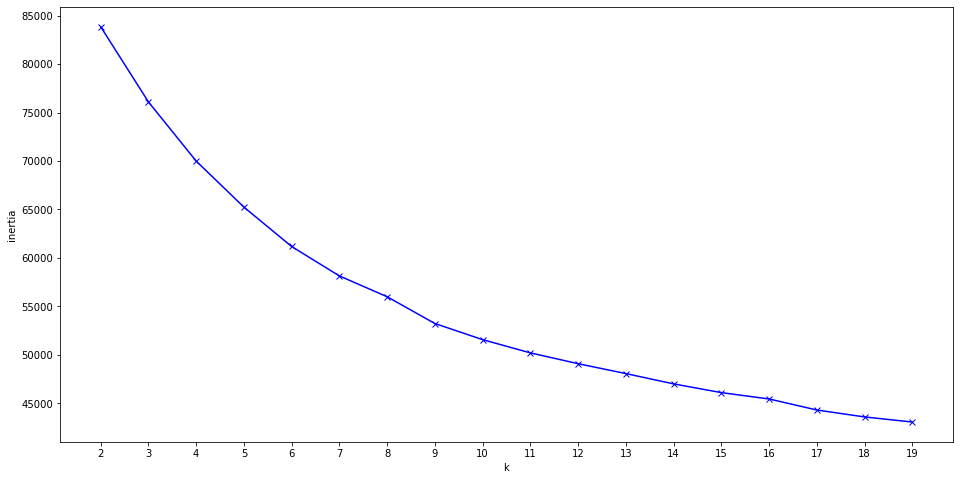

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

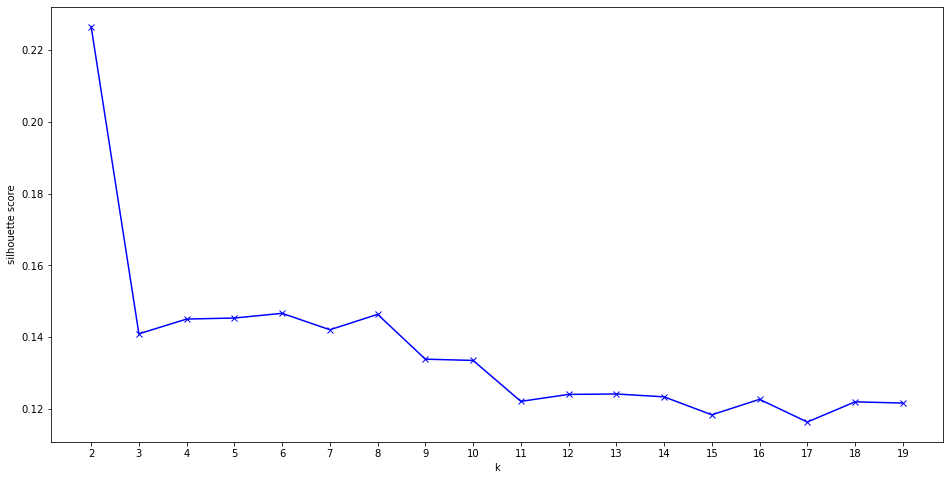

In [32]:
# Using silhouette to choose the best K

from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_prep)
    silhouette.append(silhouette_score(x_prep, kmeans.predict(x_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

In [33]:
# I choose to use K = 6 as it is the second highest from silhouette

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(x_prep)

KMeans(n_clusters=6, random_state=42)

In [34]:
# Clustering the database 

clusters = kmeans.predict(x_prep)

scaled_df = pd.DataFrame(x_prep, columns=x.columns)
scaled_df['song name'] = df['song name']
scaled_df['artist'] = df['artist']
scaled_df['cluster'] = clusters
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song name,artist,cluster
0,-0.614038,0.359280,0.174977,0.581061,0.776498,-0.595342,0.434127,-0.393864,-0.203345,0.144570,2.762673,Last Night,Morgan Wallen,0
1,-0.762120,0.359280,0.174977,0.565091,0.776498,-0.567712,0.459925,-0.393864,-0.268056,-0.017558,2.759529,Last Night,Morgan Wallen,0
2,0.120449,0.949565,0.174977,0.494954,-1.287834,-0.656645,-1.038571,-0.393849,1.306574,0.764713,-0.004978,Ain’t That Some,Morgan Wallen,2
3,0.209298,0.737431,-0.656763,0.496249,-1.287834,-0.637650,0.540545,-0.393864,-0.447808,-0.216166,0.626519,Thinkin’ Bout Me,Morgan Wallen,2
4,-0.726580,0.769712,-0.379517,0.662203,0.776498,-0.636786,-0.649403,-0.393746,-0.433428,0.027027,0.894466,Man Made A Bar (feat. Eric Church),Morgan Wallen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9345,-2.213324,1.253930,0.174977,0.710759,-1.287834,-0.076417,-1.045459,-0.393859,1.615748,-0.941692,2.727194,XTAYALIVE,jnhygs,5
9346,-0.436339,1.226261,0.729470,0.725002,-1.287834,-0.177439,-1.046000,-0.393149,1.256244,0.079719,-0.084128,XTAYALIVE (Sped Up),jnhygs,2
9347,-1.508453,1.198591,1.283963,0.197360,-1.287834,-0.535764,-1.043566,-0.393610,1.622938,-0.054037,-1.471515,XTAYALIVE (Slowed + Reverb),jnhygs,5
9348,-2.213324,1.253930,0.174977,0.710759,-1.287834,-0.076417,-1.045459,-0.393859,1.615748,-0.941692,2.727194,XTAYALIVE,jnhygs,5


In [39]:
# Song recommender function

def recommend_song():
   
    song_name = input('Choose a song: ')
    results = sp.search(q=f'track:{song_name}', limit=1)
    track_id = results['tracks']['items'][0]['id']
    
    audio_features = sp.audio_features(track_id)
    
    df_ = pd.DataFrame(audio_features)
    new_features = df_[x.columns]
    
    scaled_x = scaler.transform(new_features)
    
    cluster = kmeans.predict(scaled_x)
    
    filtered_df = np.array(scaled_df[scaled_df['cluster'] == cluster[0]][x.columns], order="C")
    
    closest, _ = pairwise_distances_argmin_min(scaled_x, filtered_df)
    
    print('\n[RECOMMENDED SONG]')
    
    return ' - '.join([scaled_df.loc[closest]['song name'].values[0], scaled_df.loc[closest]['artist'].values[0]])

In [46]:
recommend_song()

Choose a song: Wonderwall - Oasis

[RECOMMENDED SONG]


'Fast Times - Sabrina Carpenter'